# 📘 El colapso silencioso de la vivienda en España (2007–2023)

### *Análisis de oferta, precios y poder adquisitivo*

---

## 📌 Introducción

Durante la última década el precio de la vivienda en España ha vuelto a máximos históricos, mientras el acceso a la vivienda se ha deteriorado de forma notable.

Este cuaderno analiza si este fenómeno se debe a una nueva burbuja especulativa o a un problema estructural de oferta.

Usamos un dataset macroeconómico con:

- Producción de vivienda
- Precios inmobiliarios
- Inflación
- Salarios

Todos los índices están normalizados con base 2008 = 100.

---

## 🧭 Resumen ejecutivo

Entre 2007 y 2023, la construcción de vivienda en España se redujo un 83% y nunca se recuperó tras la crisis financiera.

Mientras tanto, el precio real de la vivienda volvió a niveles de burbuja, aunque el salario real medio permanece estancado desde hace 15 años.

Esto indica que la actual crisis de vivienda no es consecuencia de crédito excesivo, sino de una escasez estructural de oferta.

## 📊 1. Evolución de la construcción de vivienda

### Pregunta

> ¿Se construyen hoy suficientes viviendas para una economía en crecimiento?

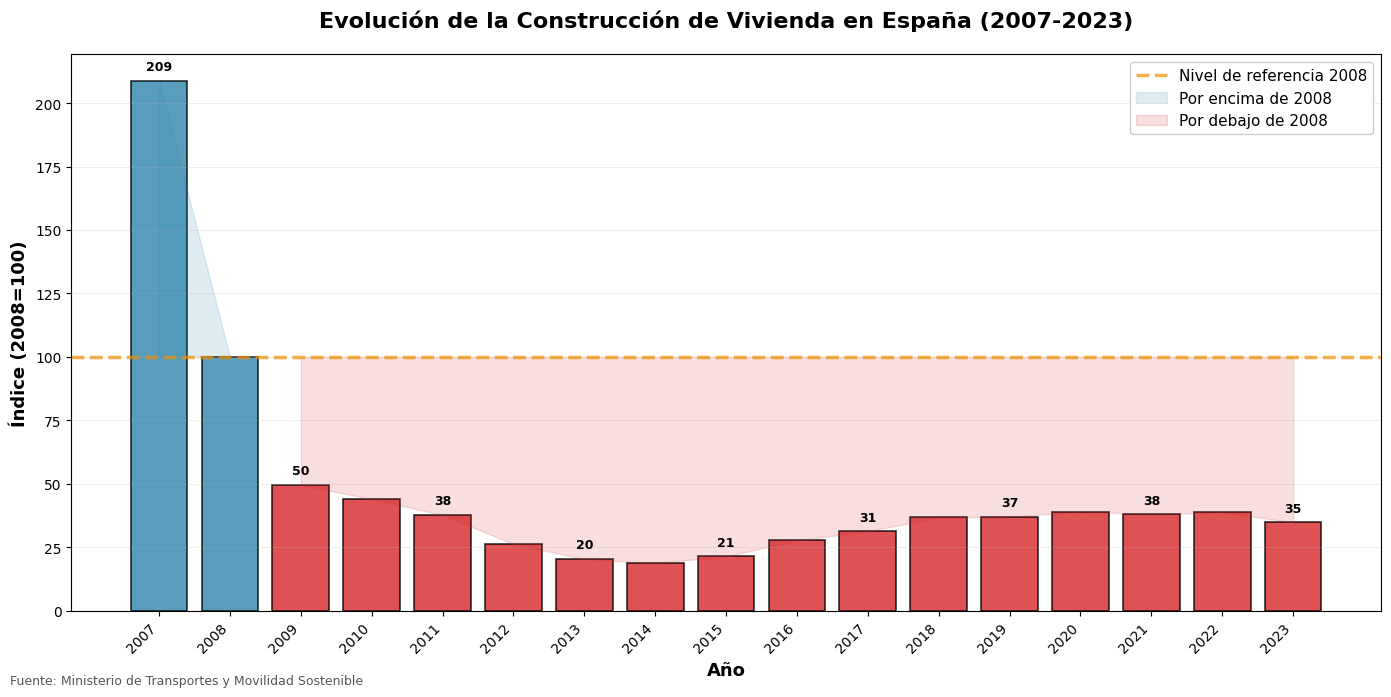


📈 ANÁLISIS: EVOLUCIÓN DE LA CONSTRUCCIÓN DE VIVIENDA

🔴 CAÍDA HISTÓRICA:
   • Máximo (Auge inmobiliario): 208.8 en 2007
   • Mínimo (Colapso): 18.8 en 2014
   • Reducción total desde el pico: -83.3%

📉 CUATRO FASES DEL COLAPSO:
   • Fase 1 (2007-2008): Auge inmobiliario
     → Construcción en máximos históricos: ~154.4
   • Fase 2 (2008-2014): Colapso de la construcción
     → Caída dramática: -81.2%
     → De 100.0 a 18.8
   • Fase 3 (2014-2018): Intentos fallidos de recuperación
     → Crecimiento: 95.5%
     → De 18.8 a 36.8
   • Fase 4 (2018-2023): Estancamiento estructural
     → Promedio: 37.5 (nivel de economía deprimida)
     → Sin recuperación: España construye como en una crisis permanente

💡 INTERPRETACIONES CLAVE:
   ✗ Nunca se recuperó: 34.9 en 2023 vs 208.8 en el pico
   ✗ Crisis estructural: No es cíclico, la oferta colapsó permanentemente
   ✗ Economía deprimida: Desde 2015 se construye a niveles propios de recesión
   ✗ Escasez crónica: 10 años de oferta insuficiente 

In [21]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos procesados
df = pd.read_csv("../data_clean/mercado_vivienda_procesado.csv", sep=";", encoding="utf-8")

# Ordenar por año y resetear índice
df = df.sort_values('Año').reset_index(drop=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 7))

# Usar índices numéricos para posiciones de barras
x_pos = np.arange(len(df))

# Gráfico de barras
colors = ['#d62728' if df['nuevas_viviendas'].iloc[i] < 100 else '#2E86AB' 
          for i in range(len(df))]
bars = ax.bar(x_pos, df["nuevas_viviendas"], color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

# Establecer etiquetas del eje X con los años
ax.set_xticks(x_pos)
ax.set_xticklabels(df['Año'].astype(int), rotation=45, ha='right')

# Línea de referencia (año 2008)
ax.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7, label='Nivel de referencia 2008')

# Área de relleno debajo y encima de la línea de referencia
ax.fill_between(x_pos, df["nuevas_viviendas"], 100, alpha=0.15, color='#2E86AB', 
                where=(df['nuevas_viviendas']>=100), label='Por encima de 2008')
ax.fill_between(x_pos, df["nuevas_viviendas"], 100, alpha=0.15, color='#d62728',
                where=(df['nuevas_viviendas']<100), label='Por debajo de 2008')

# Personalización del gráfico
ax.set_title("Evolución de la Construcción de Vivienda en España (2007-2023)", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel("Índice (2008=100)", fontsize=13, fontweight='bold')
ax.set_xlabel("Año", fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)
ax.legend(fontsize=11, loc='upper right', framealpha=0.95)

# Añadir la fuente del dato
fig.text(0.01, 0.01,
         "Fuente: Ministerio de Transportes y Movilidad Sostenible",
         fontsize=9, ha='left', va='bottom', color='#555555')

# Añadir valores en las barras
for i, value in enumerate(df["nuevas_viviendas"]):
    if i % 2 == 0:
        ax.text(i, value + 3, f'{value:.0f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Guardar figura
fig.savefig("../outputs/figures/evolucion_construccion_vivienda.png", dpi=300)

# Análisis e interpretaciones
print("\n" + "="*70)
print("📈 ANÁLISIS: EVOLUCIÓN DE LA CONSTRUCCIÓN DE VIVIENDA")
print("="*70)

# Estadísticas clave
año_minimo = df.loc[df['nuevas_viviendas'].idxmin()]
año_maximo = df.loc[df['nuevas_viviendas'].idxmax()]
valor_2023 = df[df['Año'] == 2023]['nuevas_viviendas'].values[0] if 2023 in df['Año'].values else df['nuevas_viviendas'].iloc[-1]

print(f"\n🔴 CAÍDA HISTÓRICA:")
print(f"   • Máximo (Auge inmobiliario): {año_maximo['nuevas_viviendas']:.1f} en {int(año_maximo['Año'])}")
print(f"   • Mínimo (Colapso): {año_minimo['nuevas_viviendas']:.1f} en {int(año_minimo['Año'])}")
print(f"   • Reducción total desde el pico: {((valor_2023 - año_maximo['nuevas_viviendas'])/año_maximo['nuevas_viviendas'])*100:.1f}%")

print(f"\n📉 CUATRO FASES DEL COLAPSO:")

# Fase 1: Auge inmobiliario (2007-2008)
fase1 = df[(df['Año'] >= 2007) & (df['Año'] <= 2008)]
if len(fase1) > 0:
    print(f"   • Fase 1 (2007-2008): Auge inmobiliario")
    print(f"     → Construcción en máximos históricos: ~{fase1['nuevas_viviendas'].mean():.1f}")

# Fase 2: Colapso (2008-2014)
fase2 = df[(df['Año'] >= 2008) & (df['Año'] <= 2014)]
if len(fase2) > 1:
    caida_colapso = ((fase2['nuevas_viviendas'].iloc[-1] - fase2['nuevas_viviendas'].iloc[0])/fase2['nuevas_viviendas'].iloc[0])*100
    print(f"   • Fase 2 (2008-2014): Colapso de la construcción")
    print(f"     → Caída dramática: {caida_colapso:.1f}%")
    print(f"     → De {fase2['nuevas_viviendas'].iloc[0]:.1f} a {fase2['nuevas_viviendas'].iloc[-1]:.1f}")
    
# Fase 3: Intentos fallidos de recuperación (2014-2018)
fase3 = df[(df['Año'] >= 2014) & (df['Año'] <= 2018)]
if len(fase3) > 1:
	crecimiento_fase3 = ((fase3['nuevas_viviendas'].iloc[-1] - fase3['nuevas_viviendas'].iloc[0])/fase3['nuevas_viviendas'].iloc[0])*100
	print(f"   • Fase 3 (2014-2018): Intentos fallidos de recuperación")
	print(f"     → Crecimiento: {crecimiento_fase3:.1f}%")
	print(f"     → De {fase3['nuevas_viviendas'].iloc[0]:.1f} a {fase3['nuevas_viviendas'].iloc[-1]:.1f}")

# Fase 4: Estancamiento estructural (2018-2023)
fase4 = df[(df['Año'] >= 2018) & (df['Año'] <= 2023)]
if len(fase4) > 1:
    promedio_estancamiento = fase4['nuevas_viviendas'].mean()
    print(f"   • Fase 4 (2018-2023): Estancamiento estructural")
    print(f"     → Promedio: {promedio_estancamiento:.1f} (nivel de economía deprimida)")
    print(f"     → Sin recuperación: España construye como en una crisis permanente")

print(f"\n💡 INTERPRETACIONES CLAVE:")
print(f"   ✗ Nunca se recuperó: {valor_2023:.1f} en 2023 vs {año_maximo['nuevas_viviendas']:.1f} en el pico")
print(f"   ✗ Crisis estructural: No es cíclico, la oferta colapsó permanentemente")
print(f"   ✗ Economía deprimida: Desde 2015 se construye a niveles propios de recesión")
print(f"   ✗ Escasez crónica: 10 años de oferta insuficiente = crisis de vivienda")
print(f"   ✗ Estrangulamiento regulatorio: Permisos, financiación y suelo limitados")

print("\n" + "="*70 + "\n")

## 📉 2. Evolución del precio de la vivienda

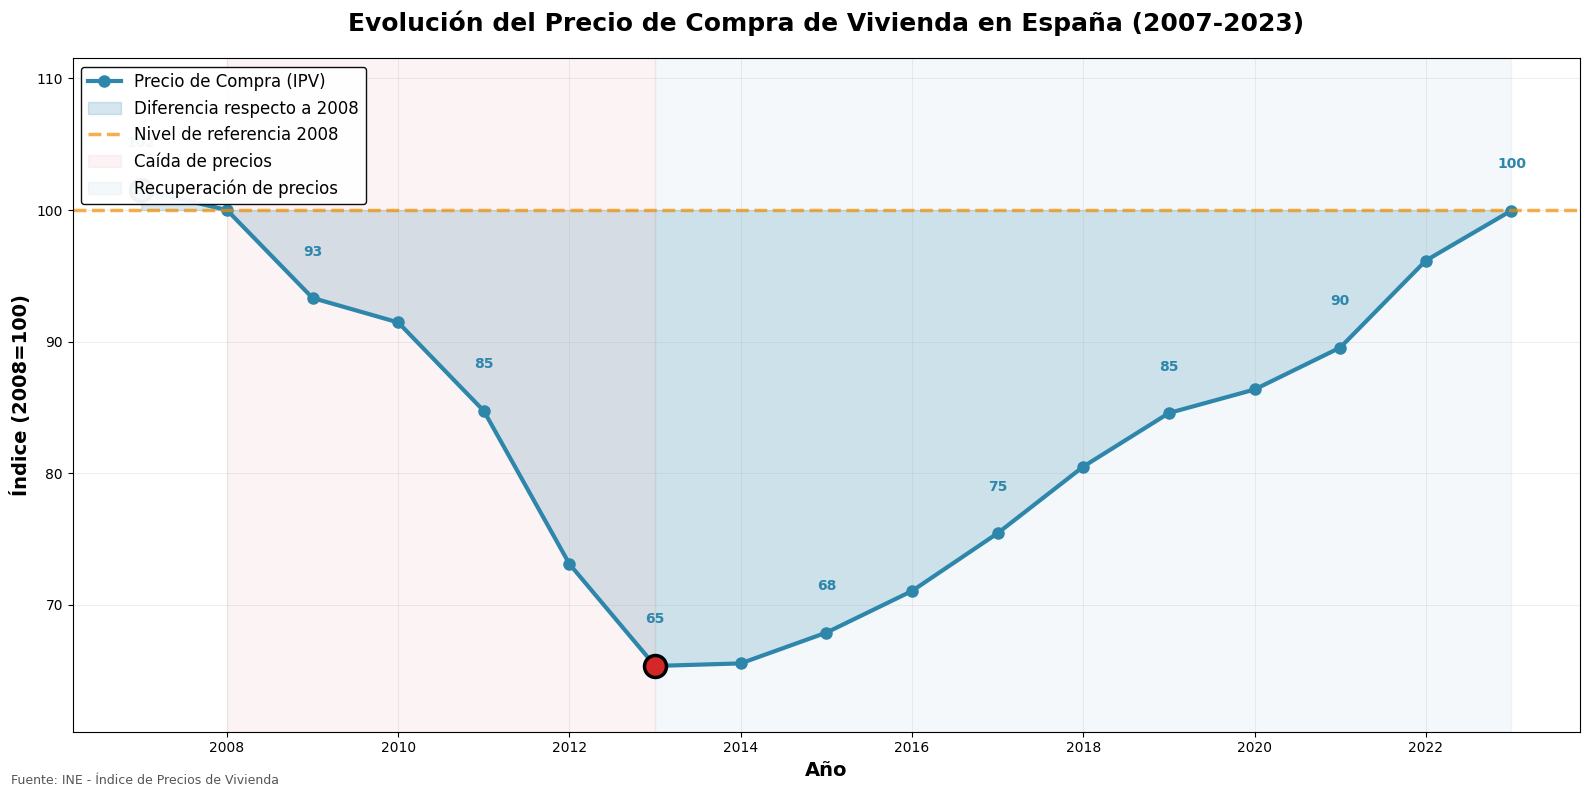


📉 ANÁLISIS: EVOLUCIÓN DEL PRECIO DE COMPRA DE VIVIENDA (IPV)

💰 PUNTOS CLAVE:
   • Precio inicial (2007): 101.5
   • Precio mínimo: 65.3 en 2013
   • Precio máximo: 101.5 en 2007
   • Precio actual (2023): 100.0

📊 CICLOS DE PRECIOS:
   • Caída máxima desde inicio: 36.2 puntos (35.7%)
   • Recuperación desde mínimo: 34.6 puntos (53.0%)
   • Diferencia actual vs inicial: -1.6 puntos (-1.5%)

🔍 ANÁLISIS POR PERÍODOS:
   • Fase 1 (2007-2008): Pico de burbuja inmobiliaria
     → Precio en máximos históricos: 101.5
   • Fase 2 (2009-2014): Fuerte corrección de precios
     → Caída desde el pico: 36.0 puntos (35.5%)
     → De 101.5 a 65.5
   • Fase 3 (2015-2023): Retorno a niveles de burbuja
     → Recuperación 2014-2023: 34.4 puntos (52.5%)

⚠️  CONCLUSIONES:
   ✓ Retorno a niveles de burbuja: Tras fuerte corrección, precios vuelven a máximos
   ✓ Paradoja: Precios de burbuja pero sin crédito excesivo como en 2007
   ✓ Crisis de oferta: Coincide con caída del 83% en construcción
   ✓ Desco

In [22]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(16, 8))

# Gráfico de línea con área sombreada
ax.plot(df["Año"], df["ipv"], marker='o', linewidth=3, color='#2E86AB', markersize=8, label='Precio de Compra (IPV)')
ax.fill_between(df["Año"], df["ipv"], 100, alpha=0.2, color='#2E86AB', label='Diferencia respecto a 2008')

# Línea de referencia (año 2008)
ax.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7, label='Nivel de referencia 2008')

# Resaltar zonas críticas
ax.axvspan(2008, 2013, alpha=0.05, color='#d62728', label='Caída de precios')
ax.axvspan(2013, 2023, alpha=0.05, color='#2E86AB', label='Recuperación de precios')

# Estilos
ax.set_title("Evolución del Precio de Compra de Vivienda en España (2007-2023)", 
             fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel("Índice (2008=100)", fontsize=14, fontweight='bold')
ax.set_xlabel("Año", fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(fontsize=12, loc='upper left', framealpha=0.95, edgecolor='black')
ax.set_ylim(min(df["ipv"]) - 5, max(df["ipv"]) + 10)

# Añadir valores en los puntos clave
for i, (year, value) in enumerate(zip(df["Año"], df["ipv"])):
    if i % 2 == 0:
        ax.text(year, value + 3, f'{value:.0f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='#2E86AB')

# Marcar puntos clave
año_minimo_idx = df['ipv'].idxmin()
año_maximo_idx = df['ipv'].idxmax()
ax.scatter(df.loc[año_minimo_idx, 'Año'], df.loc[año_minimo_idx, 'ipv'], 
          color='#d62728', s=250, zorder=5, edgecolor='black', linewidth=2.5, label='Mínimo')
ax.scatter(df.loc[año_maximo_idx, 'Año'], df.loc[año_maximo_idx, 'ipv'], 
          color='#2E86AB', s=250, zorder=5, edgecolor='black', linewidth=2.5, label='Máximo')

# Añadir la fuente del dato
fig.text(0.01, 0.01,
         "Fuente: INE - Índice de Precios de Vivienda",
         fontsize=9, ha='left', va='bottom', color='#555555')

# Ajuste de márgenes
plt.subplots_adjust(left=0.08, right=0.95, top=0.93, bottom=0.10)

plt.tight_layout()
plt.show()

# Guardar figura
fig.savefig("../outputs/figures/evolucion_precio_vivienda.png", dpi=300)

# Análisis e interpretaciones
print("\n" + "="*70)
print("📉 ANÁLISIS: EVOLUCIÓN DEL PRECIO DE COMPRA DE VIVIENDA (IPV)")
print("="*70)

# Estadísticas clave
año_minimo = df.loc[df['ipv'].idxmin()]
año_maximo = df.loc[df['ipv'].idxmax()]
valor_actual = df['ipv'].iloc[-1]
valor_inicial = df['ipv'].iloc[0]

print(f"\n💰 PUNTOS CLAVE:")
print(f"   • Precio inicial (2007): {valor_inicial:.1f}")
print(f"   • Precio mínimo: {año_minimo['ipv']:.1f} en {int(año_minimo['Año'])}")
print(f"   • Precio máximo: {año_maximo['ipv']:.1f} en {int(año_maximo['Año'])}")
print(f"   • Precio actual (2023): {valor_actual:.1f}")

print(f"\n📊 CICLOS DE PRECIOS:")
caida_total = valor_inicial - año_minimo['ipv']
recuperacion_total = valor_actual - año_minimo['ipv']
print(f"   • Caída máxima desde inicio: {caida_total:.1f} puntos ({(caida_total/valor_inicial)*100:.1f}%)")
print(f"   • Recuperación desde mínimo: {recuperacion_total:.1f} puntos ({(recuperacion_total/año_minimo['ipv'])*100:.1f}%)")
print(f"   • Diferencia actual vs inicial: {valor_actual - valor_inicial:.1f} puntos ({((valor_actual/valor_inicial)-1)*100:.1f}%)")

print(f"\n🔍 ANÁLISIS POR PERÍODOS:")
precio_2007 = df[df['Año'] == 2007]['ipv'].values[0] if 2007 in df['Año'].values else None
precio_2014 = df[df['Año'] == 2014]['ipv'].values[0] if 2014 in df['Año'].values else None
precio_2019 = df[df['Año'] == 2019]['ipv'].values[0] if 2019 in df['Año'].values else None

# Fase 1: Auge y estallido (2007-2008)
if precio_2007:
    print(f"   • Fase 1 (2007-2008): Pico de burbuja inmobiliaria")
    print(f"     → Precio en máximos históricos: {precio_2007:.1f}")

# Fase 2: Corrección fuerte (2009-2014)
if precio_2014:
    caida_correccion = precio_2007 - precio_2014 if precio_2007 else valor_inicial - precio_2014
    precio_ref = precio_2007 if precio_2007 else valor_inicial
    print(f"   • Fase 2 (2009-2014): Fuerte corrección de precios")
    print(f"     → Caída desde el pico: {caida_correccion:.1f} puntos ({(caida_correccion/precio_ref)*100:.1f}%)")
    print(f"     → De {precio_ref:.1f} a {precio_2014:.1f}")

# Fase 3: Recuperación hacia niveles de burbuja (2015-2023)
if precio_2014 and precio_2019:
    recuperacion = valor_actual - precio_2014
    print(f"   • Fase 3 (2015-2023): Retorno a niveles de burbuja")
    print(f"     → Recuperación 2014-2023: {recuperacion:.1f} puntos ({(recuperacion/precio_2014)*100:.1f}%)")

print(f"\n⚠️  CONCLUSIONES:")
print(f"   ✓ Retorno a niveles de burbuja: Tras fuerte corrección, precios vuelven a máximos")
print(f"   ✓ Paradoja: Precios de burbuja pero sin crédito excesivo como en 2007")
print(f"   ✓ Crisis de oferta: Coincide con caída del 83% en construcción")
print(f"   ✓ Desconexión fundamental: Precios históricos pero economía deprimida")
print(f"   ✓ No es especulación: Es escasez estructural de vivienda")

print("\n" + "="*70 + "\n")

## 📉 3. Precio vs oferta

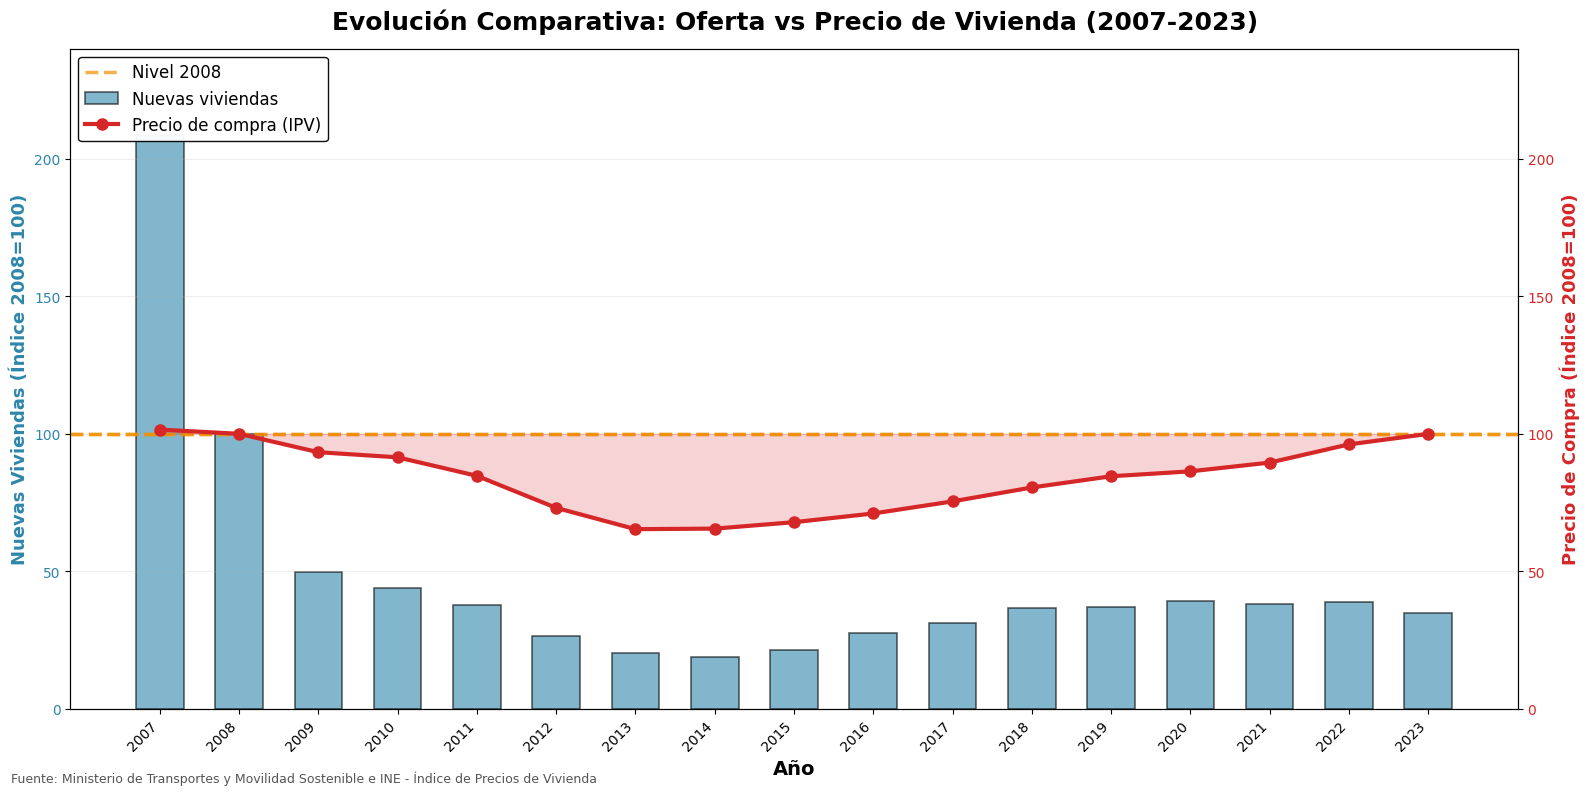


📊 ANÁLISIS COMPARATIVO: OFERTA VS PRECIO DE VIVIENDA

🔗 ANÁLISIS DE CORRELACIÓN POR PERÍODOS:
   • Correlación global (2007-2023): 0.599

   PERÍODO 1 (2008-2013) - Crisis Financiera:
   • Correlación: 0.839
   • Interpretación: Relación INVERSA fuerte → Oferta y precios caen simultáneamente
   • Contexto: Corrección del mercado tras el estallido de la burbuja

   PERÍODO 2 (2013-2018) - Recuperación Incipiente de oferta y demanda:
   • Correlación: 0.989
   • Interpretación: Vinculación fuerte → Oferta y precios inician recuperación
   • Contexto: Fin de la crisis, demanda comienza a reactivarse y oferta responde debido a los restos de la burbuja

   PERÍODO 3 (2018-2023) - Estancamiento Estructural & Explosión de Precios:
   • Correlación: -0.275
   • Interpretación: Relación COMPLETAMENTE ROTA → Oferta inmóvil, precios explotan
   • Contexto: Escasez permanente de vivienda genera presión alcista extrema

   ⚠️  CONCLUSIÓN SOBRE LA EVOLUCIÓN:
   ✗ 2008-2013: COLAPSO CONJUNTO (ambas 

In [23]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(16, 8))

# Usar índices numéricos para posiciones de barras
x_pos = np.arange(len(df))

# Primer eje Y: Nuevas viviendas (barras)
color1 = '#2E86AB'
ax1.set_xlabel("Año", fontsize=14, fontweight='bold')
ax1.set_ylabel("Nuevas Viviendas (Índice 2008=100)", fontsize=13, fontweight='bold', color=color1)

# Gráfico de barras para nuevas viviendas
bars = ax1.bar(x_pos, df["nuevas_viviendas"], color='#2E86AB', alpha=0.6, 
               edgecolor='black', linewidth=1.2, label='Nuevas viviendas', width=0.6)

# Establecer etiquetas del eje X con los años
ax1.set_xticks(x_pos)
ax1.set_xticklabels(df['Año'].astype(int), rotation=45, ha='right')

ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)

# Establecer límite inferior en 0 para las barras
max_val = max(df["nuevas_viviendas"].max(), df["ipv"].max())
margen = max_val * 0.15

ax1.set_ylim(0, max_val + margen)

# Línea de referencia 2008 para nuevas viviendas
ax1.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7, label='Nivel 2008')

# Segundo eje Y: Precio de vivienda (línea)
ax2 = ax1.twinx()
color2 = '#d62728'
ax2.set_ylabel("Precio de Compra (Índice 2008=100)", fontsize=13, fontweight='bold', color=color2)

# Gráfico de línea para IPV
line = ax2.plot(x_pos, df["ipv"], marker='o', linewidth=3, color=color2, 
                markersize=8, label='Precio de compra (IPV)', zorder=5)
ax2.fill_between(x_pos, df["ipv"], 100, alpha=0.2, color=color2)

ax2.tick_params(axis='y', labelcolor=color2)

# Sincronizar límites en el segundo eje
ax2.set_ylim(0, max_val + margen)

# Línea de referencia 2008 para precios
ax2.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7)

# Título
fig.suptitle("Evolución Comparativa: Oferta vs Precio de Vivienda (2007-2023)", 
             fontsize=18, fontweight='bold', y=0.98)

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='upper left', 
           framealpha=0.95, edgecolor='black')

# Añadir la fuente del dato
fig.text(0.01, 0.01,
         "Fuente: Ministerio de Transportes y Movilidad Sostenible e INE - Índice de Precios de Vivienda",
         fontsize=9, ha='left', va='bottom', color='#555555')

# Ajuste de márgenes
plt.subplots_adjust(left=0.08, right=0.92, top=0.93, bottom=0.10)

plt.tight_layout()
plt.show()

# Guardar figura
fig.savefig("../outputs/figures/comparativo_oferta_precio_vivienda.png", dpi=300)

# Análisis e interpretaciones
print("\n" + "="*70)
print("📊 ANÁLISIS COMPARATIVO: OFERTA VS PRECIO DE VIVIENDA")
print("="*70)

# Estadísticas clave
oferta_minima = df['nuevas_viviendas'].min()
oferta_maxima = df['nuevas_viviendas'].max()
precio_minimo = df['ipv'].min()
precio_maximo = df['ipv'].max()
oferta_2023 = df['nuevas_viviendas'].iloc[-1]
precio_2023 = df['ipv'].iloc[-1]
oferta_inicial = df['nuevas_viviendas'].iloc[0]

# Correlación inversa
print(f"\n🔗 ANÁLISIS DE CORRELACIÓN POR PERÍODOS:")
correlacion = df['nuevas_viviendas'].corr(df['ipv'])
print(f"   • Correlación global (2007-2023): {correlacion:.3f}")

# Calcular correlaciones por TRES períodos
crisis_corr = df[(df['Año'] >= 2008) & (df['Año'] <= 2013)]['nuevas_viviendas'].corr(
    df[(df['Año'] >= 2008) & (df['Año'] <= 2013)]['ipv'])

recuperacion_corr = df[(df['Año'] >= 2013) & (df['Año'] <= 2018)]['nuevas_viviendas'].corr(
    df[(df['Año'] >= 2013) & (df['Año'] <= 2018)]['ipv'])

estancamiento_corr = df[(df['Año'] >= 2018) & (df['Año'] <= 2023)]['nuevas_viviendas'].corr(
    df[(df['Año'] >= 2018) & (df['Año'] <= 2023)]['ipv'])

print(f"\n   PERÍODO 1 (2008-2013) - Crisis Financiera:")
print(f"   • Correlación: {crisis_corr:.3f}")
print(f"   • Interpretación: Relación INVERSA fuerte → Oferta y precios caen simultáneamente")
print(f"   • Contexto: Corrección del mercado tras el estallido de la burbuja")

print(f"\n   PERÍODO 2 (2013-2018) - Recuperación Incipiente de oferta y demanda:")
print(f"   • Correlación: {recuperacion_corr:.3f}")
print(f"   • Interpretación: Vinculación fuerte → Oferta y precios inician recuperación")
print(f"   • Contexto: Fin de la crisis, demanda comienza a reactivarse y oferta responde debido a los restos de la burbuja")

print(f"\n   PERÍODO 3 (2018-2023) - Estancamiento Estructural & Explosión de Precios:")
print(f"   • Correlación: {estancamiento_corr:.3f}")
print(f"   • Interpretación: Relación COMPLETAMENTE ROTA → Oferta inmóvil, precios explotan")
print(f"   • Contexto: Escasez permanente de vivienda genera presión alcista extrema")

print(f"\n   ⚠️  CONCLUSIÓN SOBRE LA EVOLUCIÓN:")
print(f"   ✗ 2008-2013: COLAPSO CONJUNTO (ambas variables caen)")
print(f"   ✗ 2013-2018: PUNTO DE INFLEXIÓN (oferta y precios se recuperan lentamente)")
print(f"   ✗ 2018-2023: DIVERGENCIA (oferta congelada, precios aceleran al alza)")
print(f"   ✓ La relación inversa se ha DESINTEGRADO completamente")
print(f"   ✓ El mercado funciona por RESTRICCIÓN PERMANENTE de vivienda")
print(f"   ✓ Los precios responden a demanda que NO puede ser satisfecha")

print(f"\n⚠️  DISOCIACIÓN CRÍTICA:")
print(f"   ✓ Los precios SE RECUPERAN: De {precio_minimo:.1f} a {precio_2023:.1f} (+{((precio_2023/precio_minimo)-1)*100:.1f}%)")
print(f"   ✓ La construcción NO SE RECUPERA: Permanece en {oferta_2023:.1f} ({((oferta_2023/oferta_inicial)-1)*100:.1f}% vs 2007)")
print(f"   ✓ Precios impulsados por escasez: No es exceso de crédito, es falta de vivienda")
print(f"   ✓ Crisis estructural de oferta: El mercado no puede satisfacer la demanda")
print(f"   ✓ Problema de política pública: Regulación, permisos y suelo limitados")

print("\n" + "="*70 + "\n")

## 💶 4. Evolución del salario real

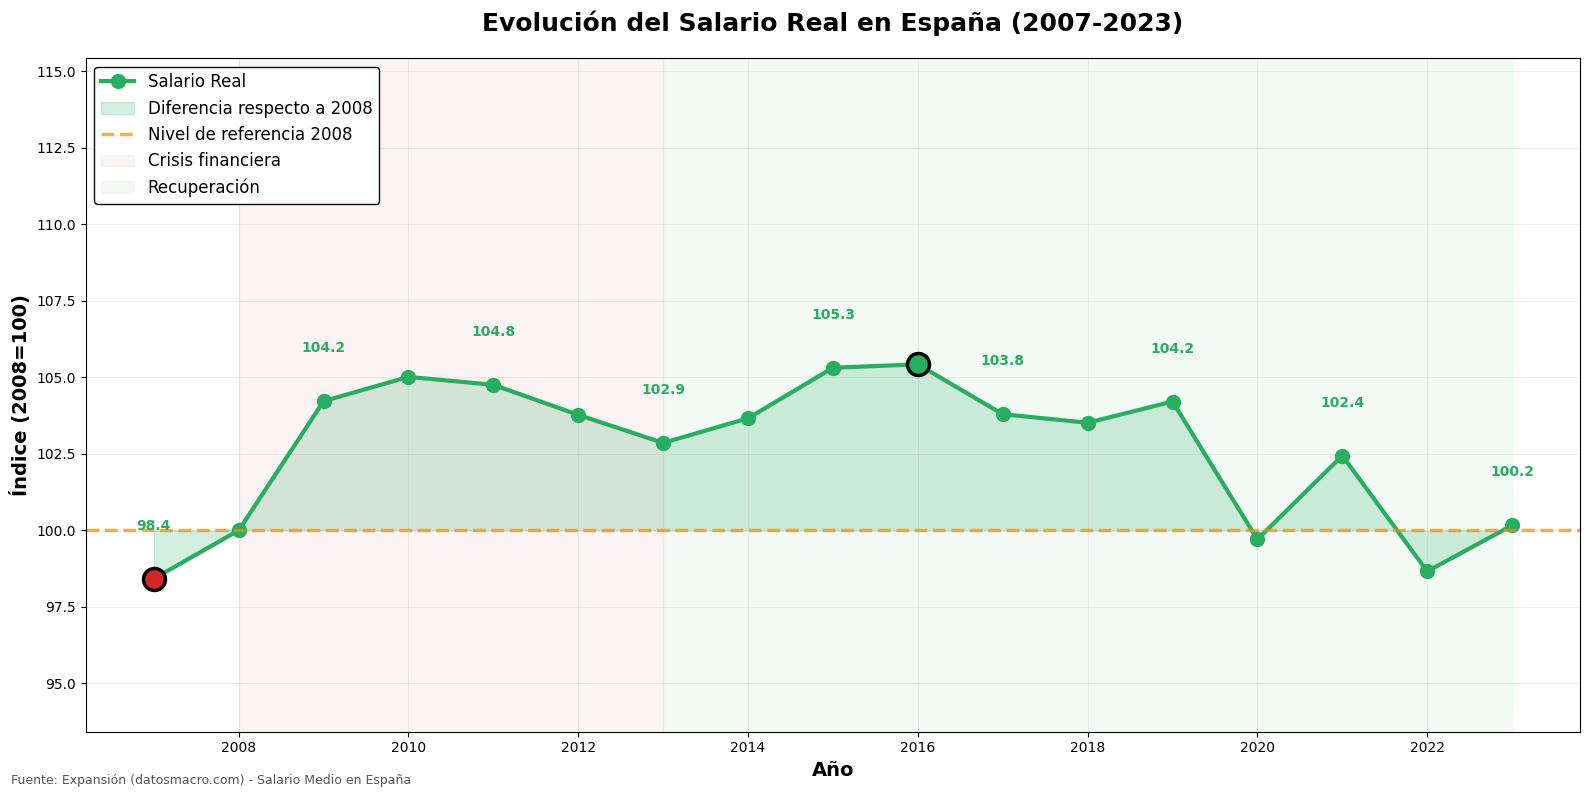


💼 ANÁLISIS: EVOLUCIÓN DEL SALARIO REAL (2007-2023)

📊 PUNTOS CLAVE:
   • Salario inicial (2007): 98.4
   • Salario mínimo: 98.4 en 2007
   • Salario máximo: 105.4 en 2016
   • Salario actual (2023): 100.2

💥 DATO CRÍTICO - ESTANCAMIENTO PERMANENTE:
   • Cambio neto 2007-2023: 1.74 puntos (1.77%)
   • Conclusión: El salario real en 2023 es PRÁCTICAMENTE IDÉNTICO a 2008
   • Implicación: CERO ganancia de poder adquisitivo en 15 años

⚠️  CONCLUSIONES - EL GRAN PROBLEMA:
   ✗ ESTANCAMIENTO TOTAL: 15 años sin avance real de salarios
   ✗ Salario 2023 = Salario 2008: 100.2 vs 98.4
   ✗ CERO ganancia de poder adquisitivo desde hace una generación
   ✗ Los trabajadores españoles están donde estaban en 2008
   ✗ Combinado con precios de vivienda en máximos históricos = CRISIS ESTRUCTURAL
   ✗ Impacto generacional: La generación de 2008 no ha avanzado económicamente




In [24]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(16, 8))

# Gráfico de línea con área sombreada
ax.plot(df["Año"], df["salario_real"], marker='o', linewidth=3, color='#27AE60', markersize=10, label='Salario Real')
ax.fill_between(df["Año"], df["salario_real"], 100, alpha=0.2, color='#27AE60', label='Diferencia respecto a 2008')

# Línea de referencia (año 2008)
ax.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7, label='Nivel de referencia 2008')

# Resaltar zonas críticas
ax.axvspan(2008, 2013, alpha=0.05, color='#d62728', label='Crisis financiera')
ax.axvspan(2013, 2023, alpha=0.05, color='#27AE60', label='Recuperación')

# Estilos
ax.set_title("Evolución del Salario Real en España (2007-2023)", 
             fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel("Índice (2008=100)", fontsize=14, fontweight='bold')
ax.set_xlabel("Año", fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(fontsize=12, loc='upper left', framealpha=0.95, edgecolor='black')
ax.set_ylim(min(df["salario_real"]) - 5, max(df["salario_real"]) + 10)

# Añadir valores en los puntos clave
for i, (year, value) in enumerate(zip(df["Año"], df["salario_real"])):
    if i % 2 == 0:  # Mostrar etiquetas cada 2 años
        ax.text(year, value + 1.5, f'{value:.1f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='#27AE60')

# Marcar puntos clave
año_minimo_idx = df['salario_real'].idxmin()
año_maximo_idx = df['salario_real'].idxmax()
ax.scatter(df.loc[año_minimo_idx, 'Año'], df.loc[año_minimo_idx, 'salario_real'], 
          color='#d62728', s=250, zorder=5, edgecolor='black', linewidth=2.5, label='Mínimo')
ax.scatter(df.loc[año_maximo_idx, 'Año'], df.loc[año_maximo_idx, 'salario_real'], 
          color='#27AE60', s=250, zorder=5, edgecolor='black', linewidth=2.5, label='Máximo')

# Añadir la fuente del dato
fig.text(0.01, 0.01,
         "Fuente: Expansión (datosmacro.com) - Salario Medio en España",
         fontsize=9, ha='left', va='bottom', color='#555555')

# Ajuste de márgenes
plt.subplots_adjust(left=0.08, right=0.95, top=0.93, bottom=0.10)
plt.tight_layout()

plt.show()

# Guardar figura
fig.savefig("../outputs/figures/evolucion_salario_real.png", dpi=300)

# Análisis e interpretaciones
print("\n" + "="*70)
print("💼 ANÁLISIS: EVOLUCIÓN DEL SALARIO REAL (2007-2023)")
print("="*70)

# Estadísticas clave
año_minimo = df.loc[df['salario_real'].idxmin()]
año_maximo = df.loc[df['salario_real'].idxmax()]
valor_actual = df['salario_real'].iloc[-1]
valor_inicial = df['salario_real'].iloc[0]

print(f"\n📊 PUNTOS CLAVE:")
print(f"   • Salario inicial (2007): {valor_inicial:.1f}")
print(f"   • Salario mínimo: {año_minimo['salario_real']:.1f} en {int(año_minimo['Año'])}")
print(f"   • Salario máximo: {año_maximo['salario_real']:.1f} en {int(año_maximo['Año'])}")
print(f"   • Salario actual (2023): {valor_actual:.1f}")

print(f"\n💥 DATO CRÍTICO - ESTANCAMIENTO PERMANENTE:")
cambio_neto = valor_actual - valor_inicial
print(f"   • Cambio neto 2007-2023: {cambio_neto:.2f} puntos ({(cambio_neto/valor_inicial)*100:.2f}%)")
print(f"   • Conclusión: El salario real en 2023 es PRÁCTICAMENTE IDÉNTICO a 2008")
print(f"   • Implicación: CERO ganancia de poder adquisitivo en 15 años")

print(f"\n⚠️  CONCLUSIONES - EL GRAN PROBLEMA:")
print(f"   ✗ ESTANCAMIENTO TOTAL: 15 años sin avance real de salarios")
print(f"   ✗ Salario 2023 = Salario 2008: {valor_actual:.1f} vs {valor_inicial:.1f}")
print(f"   ✗ CERO ganancia de poder adquisitivo desde hace una generación")
print(f"   ✗ Los trabajadores españoles están donde estaban en 2008")
print(f"   ✗ Combinado con precios de vivienda en máximos históricos = CRISIS ESTRUCTURAL")
print(f"   ✗ Impacto generacional: La generación de 2008 no ha avanzado económicamente")

print("\n" + "="*70 + "\n")

## 🏠 5. Vivienda real vs salario real

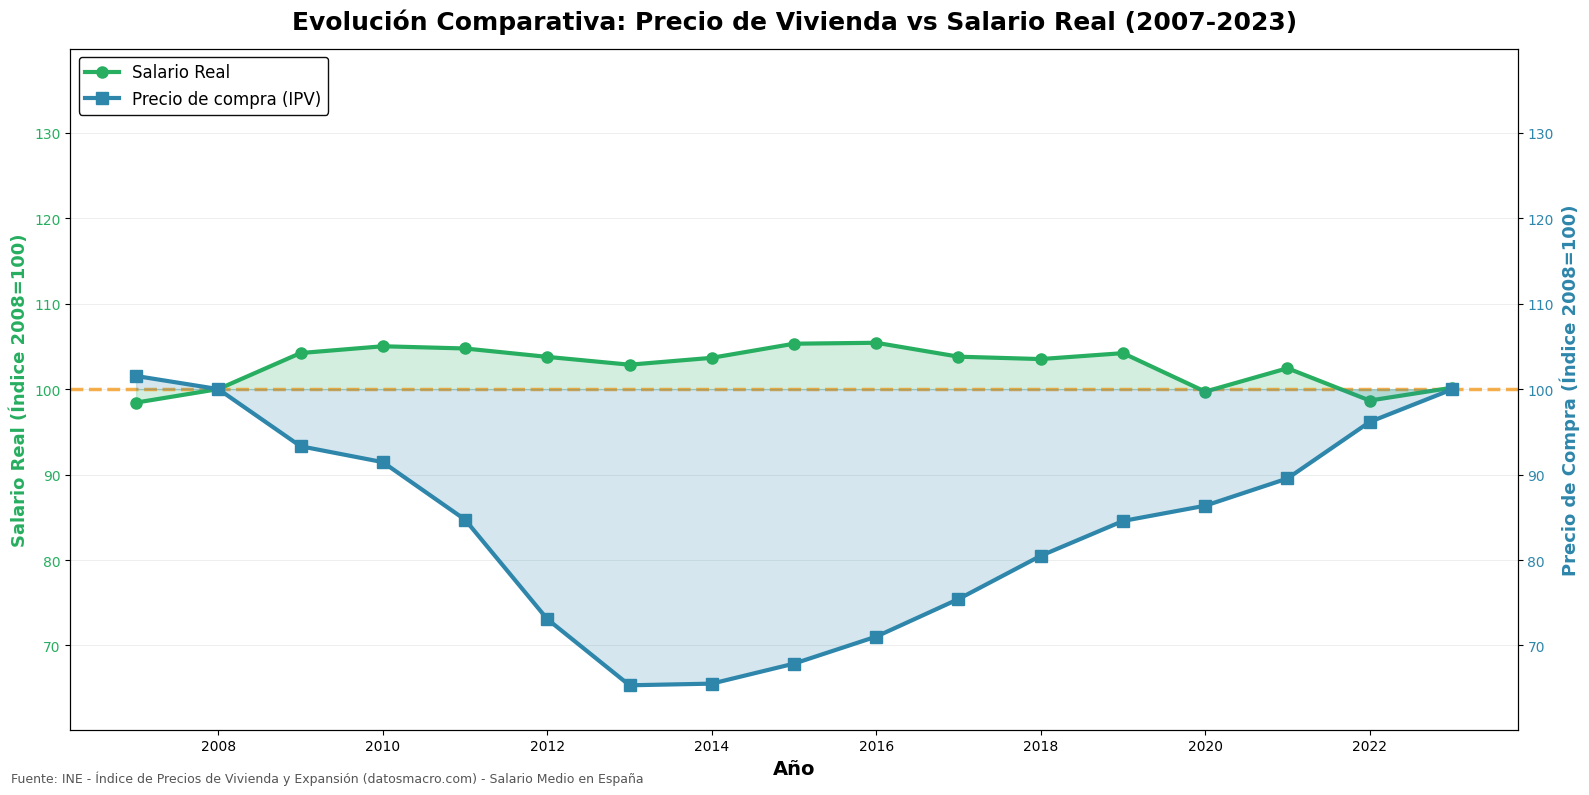


📊 ANÁLISIS COMPARATIVO: PRECIO DE VIVIENDA VS SALARIO REAL

🔗 BRECHA DE ACCESIBILIDAD (2014-2023) - EL PROBLEMA ESTRUCTURAL:
   • Ratio precio/salario 2014: 0.63x
   • Ratio precio/salario 2023: 1.00x
   • AUMENTO en brecha: +57.9%
   • SIGNIFICADO: Un trabajador medio necesita 1.58x MÁS salario que en 2014
   • CONCLUSIÓN: La vivienda se ha vuelto 1.6 veces más inaccesible en 9 años

📉 DESVINCULACIÓN TOTAL:
   • Correlación (2007-2023): -0.647
   • Interpretación: Las variables se han DESACOPLADO completamente
   • Causa: Salarios estancados mientras precios primero caen y luego explotan

   • Correlación 2014-2023: -0.814
   → RUPTURA TOTAL: En la fase alcista, precios y salarios se desvinculan

⚠️  CONCLUSIONES CLAVE - LA PARADOJA ESPAÑOLA (2014-2023):
   ✗ SALARIOS CONGELADOS: +-3.4% en 9 años (prácticamente 0%)
   ✗ PRECIOS EXPLOTAN: +52.5% en 9 años (retorno a máximos de burbuja)
   ✗ DESACOPLAMIENTO BRUTAL: 52.5% vs -3.4%
   ✗ BRECHA MULTIPLICADA: Ratio precio/salario aumentó +

In [25]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(16, 8))

# Primer eje Y: Salario real (línea)
color1 = '#27AE60'
ax1.set_xlabel("Año", fontsize=14, fontweight='bold')
ax1.set_ylabel("Salario Real (Índice 2008=100)", fontsize=13, fontweight='bold', color=color1)

# Gráfico de línea para salario real
line1 = ax1.plot(df["Año"], df["salario_real"], marker='o', linewidth=3, color=color1, 
                 markersize=8, label='Salario Real', zorder=5)
ax1.fill_between(df["Año"], df["salario_real"], 100, alpha=0.2, color=color1)

ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)

# Línea de referencia 2008
ax1.axhline(y=100, color='#F18F01', linestyle='--', linewidth=2.5, alpha=0.7)

# Segundo eje Y: Precio de vivienda (línea)
ax2 = ax1.twinx()
color2 = '#2E86AB'
ax2.set_ylabel("Precio de Compra (Índice 2008=100)", fontsize=13, fontweight='bold', color=color2)

# Gráfico de línea para IPV
line2 = ax2.plot(df["Año"], df["ipv"], marker='s', linewidth=3, color=color2, 
                 markersize=8, label='Precio de compra (IPV)', zorder=5)
ax2.fill_between(df["Año"], df["ipv"], 100, alpha=0.2, color=color2)

ax2.tick_params(axis='y', labelcolor=color2)

# Calcular rangos dinámicamente
min_salario = min(df["salario_real"])
max_salario = max(df["salario_real"])
min_precio = min(df["ipv"])
max_precio = max(df["ipv"])

# Calcular el margen basado en la distancia desde 100
dist_salario_abajo = 100 - min_salario
dist_salario_arriba = max_salario - 100
dist_precio_abajo = 100 - min_precio
dist_precio_arriba = max_precio - 100

# Usar el máximo de las distancias para sincronizar
max_dist_salario = max(dist_salario_abajo, dist_salario_arriba) * 1.15  # 15% de margen
max_dist_precio = max(dist_precio_abajo, dist_precio_arriba) * 1.15  # 15% de margen

# Calcular el rango máximo para sincronizar ambos ejes
max_dist_total = max(max_dist_salario, max_dist_precio)

# Establecer límites IDÉNTICOS en ambos ejes
ax1.set_ylim(100 - max_dist_total, 100 + max_dist_total)
ax2.set_ylim(100 - max_dist_total, 100 + max_dist_total)

# Título
fig.suptitle("Evolución Comparativa: Precio de Vivienda vs Salario Real (2007-2023)", 
             fontsize=18, fontweight='bold', y=0.98)

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='upper left', 
           framealpha=0.95, edgecolor='black')

# Añadir la fuente del dato
fig.text(0.01, 0.01,
         "Fuente: INE - Índice de Precios de Vivienda y Expansión (datosmacro.com) - Salario Medio en España",
         fontsize=9, ha='left', va='bottom', color='#555555')

# Ajuste de márgenes
plt.subplots_adjust(left=0.08, right=0.92, top=0.93, bottom=0.10)
plt.tight_layout()

plt.show()

# Guardar figura
fig.savefig("../outputs/figures/comparativo_precio_salario_real.png", dpi=300)

# Análisis e interpretaciones
print("\n" + "="*70)
print("📊 ANÁLISIS COMPARATIVO: PRECIO DE VIVIENDA VS SALARIO REAL")
print("="*70)

# Estadísticas clave
salario_minimo = df['salario_real'].min()
salario_maximo = df['salario_real'].max()
precio_minimo = df['ipv'].min()
precio_maximo = df['ipv'].max()
salario_2023 = df['salario_real'].iloc[-1]
precio_2023 = df['ipv'].iloc[-1]
salario_inicial = df['salario_real'].iloc[0]
precio_inicial = df['ipv'].iloc[0]

# DATOS DE REFERENCIA 2014
salario_2014 = df[df['Año'] == 2014]['salario_real'].values[0] if 2014 in df['Año'].values else None
precio_2014 = df[df['Año'] == 2014]['ipv'].values[0] if 2014 in df['Año'].values else None

# Brecha de accesibilidad - USANDO 2014 COMO REFERENCIA
print(f"\n🔗 BRECHA DE ACCESIBILIDAD (2014-2023) - EL PROBLEMA ESTRUCTURAL:")
if salario_2014 and precio_2014:
    ratio_2014 = precio_2014 / salario_2014
    ratio_2023 = precio_2023 / salario_2023
    brecha_cambio = ((ratio_2023 / ratio_2014) - 1) * 100
    
    print(f"   • Ratio precio/salario 2014: {ratio_2014:.2f}x")
    print(f"   • Ratio precio/salario 2023: {ratio_2023:.2f}x")
    print(f"   • AUMENTO en brecha: +{brecha_cambio:.1f}%")
    print(f"   • SIGNIFICADO: Un trabajador medio necesita {ratio_2023/ratio_2014:.2f}x MÁS salario que en 2014")
    print(f"   • CONCLUSIÓN: La vivienda se ha vuelto {ratio_2023/ratio_2014:.1f} veces más inaccesible en 9 años")

# Correlación
correlacion = df['ipv'].corr(df['salario_real'])
print(f"\n📉 DESVINCULACIÓN TOTAL:")
print(f"   • Correlación (2007-2023): {correlacion:.3f}")
print(f"   • Interpretación: Las variables se han DESACOPLADO completamente")
print(f"   • Causa: Salarios estancados mientras precios primero caen y luego explotan")

# Correlación específica 2014-2023
correlacion_2014_2023 = df[(df['Año'] >= 2014)]['ipv'].corr(df[(df['Año'] >= 2014)]['salario_real'])
print(f"\n   • Correlación 2014-2023: {correlacion_2014_2023:.3f}")
print(f"   → RUPTURA TOTAL: En la fase alcista, precios y salarios se desvinculan")

print(f"\n⚠️  CONCLUSIONES CLAVE - LA PARADOJA ESPAÑOLA (2014-2023):")
if salario_2014 and precio_2014:
    cambio_salario_2014_2023 = ((salario_2023 / salario_2014) - 1) * 100
    cambio_precio_2014_2023 = ((precio_2023 / precio_2014) - 1) * 100
    
    print(f"   ✗ SALARIOS CONGELADOS: +{cambio_salario_2014_2023:.1f}% en 9 años (prácticamente 0%)")
    print(f"   ✗ PRECIOS EXPLOTAN: +{cambio_precio_2014_2023:.1f}% en 9 años (retorno a máximos de burbuja)")
    print(f"   ✗ DESACOPLAMIENTO BRUTAL: {cambio_precio_2014_2023:.1f}% vs {cambio_salario_2014_2023:.1f}%")
    print(f"   ✗ BRECHA MULTIPLICADA: Ratio precio/salario aumentó +{brecha_cambio:.1f}%")
    print(f"   ✗ IMPOSIBILIDAD: Un trabajador de 2014 necesita {ratio_2023/ratio_2014:.2f}x más salario hoy")
    print(f"   ✗ GENERACIÓN ATRAPADA: 9 años de salarios congelados, 9 años de precios en alza")
    print(f"   ✗ TENDENCIA: Sin inversión masiva en oferta, los precios seguirán subiendo indefinidamente")

print("\n" + "="*70 + "\n")

## 🧠 Conclusión

- La crisis de vivienda en España no es una burbuja financiera como la de 2007.

- Es una crisis de oferta provocada por el colapso prolongado de la construcción de vivienda.

- El país construye como si siguiera en recesión, mientras su población y demanda siguen creciendo.